# Projeto 1 - Ciência dos Dados

Larissa Oliveira da Silva

## Possíveis perguntas a serem respondidas:

- Qual o impacto economico nos países que mesmo sendo parte da UE não têm o euro como moeda (Bulgária, Croácia, Dinamarca, Hungria, Polónia, Roménia, Reino Unido, República Checa e Suécia)? <br>
<br>
- Estar na zona do euro impacta na desigualdade social?

## Pergunta escolhida?

- Estar na zona do euro impacta na desigualdade social?

## Explicação da hipótese e mecanismo: 

### Hipóteses:
- como o possuir a mesma moeda de países vizinhos facilita a busca por preços menores e favorece a competição comercial, além de anular as preocupações com taxas de cambio, suponho que os países  que não adotam o euro possuem uma economia mais debilitada estando em posições menores no ranking;<br>
<br>
- como a inflação nos países que adotaram o euro tem se mantido relativamente baixa e o apoio popular a moeda tem crescido a cada ano, acredito que a introdução dessa moeda ajude a diminuir os indíces de desigualdade;
          
### Mecanismos: 
- Como o índice de gini mede a desigualdade social, pretendo utilizar suas medições para checar minha hipótese a respeito do impacto da adoção do euro na igualdade social;<br>
<br>
- Utilizando ainda o mesmo índice, será possível comparar países fora da UE com os de maior igualdade social, a fim de concluir se a participação no bloco altera significativamente esse parâmetro;

## Bases para hipóteses: <br>

- https://www.gapminder.org/data/
- https://www.ecb.europa.eu/explainers/tell-me/html/benefits-euro-euroat20.pt.html <br>
- https://ec.europa.eu/info/about-european-commission/euro/benefits-euro_pt <br>
- https://www.eu2017.mt/en/Pages/A-Brief-History-of-the-EU.aspx

##### Observação:
Como utilizarei o índice de gini para basear minha análise, acredito ser importante explicar sobre seu funcionamento;

O índice de Gini segue ma escala de 0 (quando não há desigualdade) a 1 (com desigualdade máxima). Porém, meu dados foram previamente tranformados em percentil pela fonte dos mesmo, assim, quanto menor é o valor, menos desigual um país é, no nosso caso, quanto mais perto de 100, mais desigualdade social há.

## Análise de dados:

                    1930  1935  1940  1945  1950  1955  1960  1965  1970  \
country                                                                    
Austria             23.4  23.4  23.5  23.5  24.0  26.4  29.2  29.8  29.4   
Belgium             33.8  32.3  30.0  27.7  26.2  28.0  30.5  28.6  25.3   
Bulgaria            27.5  26.7  25.8  25.0  24.1  23.3  22.5  21.8  21.2   
Croatia             27.1  26.4  24.8  23.2  21.9  21.6  21.8  22.0  22.2   
Republic of Cyprus   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Czech Republic      26.7  26.7  26.6  26.5  25.9  23.1  19.8  18.9  18.8   
Denmark             29.1  28.4  27.1  25.9  24.7  23.8  22.9  21.6  20.8   
Estonia             39.4  38.7  37.1  35.5  35.0  38.2  42.7  44.2  44.2   
Finland             32.3  30.7  26.8  24.5  28.4  33.4  34.1  33.3  30.0   
France              57.7  52.8  49.6  42.4  39.6  41.2  42.4  42.3  39.3   
Germany             30.4  31.2  35.8  35.3  32.8  31.4  32.6  32.6  29.8   
Greece      

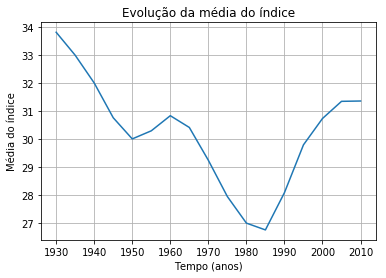

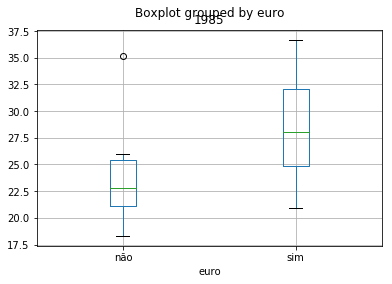

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np

meu_diretorio = "/Users/User/Documents/2° semestre/Ciência dos dados/Aulas"
os.chdir(meu_diretorio)

dados = pd.read_excel('gini.xlsx')


gini_idx = dados.set_index('country')

anos = range(1930, 2015, 5)
paises = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']

ue_gini = gini_idx.reindex( index=paises, columns=anos)

plt.plot(anos,ue_gini.mean())
plt.title("Evolução da média do índice")
plt.xlabel("Tempo (anos)")
plt.ylabel("Média do índice")
plt.grid(True)

paises_sem_euro = ['Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Hungary', 'Poland', 'Romania', 'Sweden', 'United Kingdom']
ue_gini.loc[:,"euro"] = "sim"
ue_gini.loc[paises_sem_euro, "euro"] = "não"

print(ue_gini)

ue_gini.boxplot(column=1985, by="euro")
#1985 por ser o ano aproximado do minimo valor médio do índice de gini e, portanto, o ano com maior igualdade social na união europeia

            
            
            
            

Mesmo próximo ao maior indice médio de igualdade social (em 1985), vê-se uma disparidade clara nos níveis de distribuição de renda dos países com e sem euro, como mostrado pela distribução dos dados no boxplot.

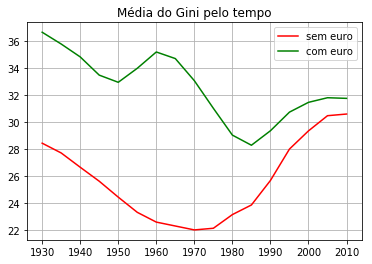

In [12]:
x= ue_gini.loc[paises_sem_euro]
y = x.mean()
paises_com_euro = []

for pais in paises:
    if pais not in paises_sem_euro:
            paises_com_euro.append(pais)
            
w= ue_gini.loc[paises_com_euro]
z = w.mean()

plt.title('Média do Gini pelo tempo')
plt.plot(anos, y, 'r', label='sem euro')
plt.plot(anos, z, 'g', label='com euro')
plt.grid(True)
plt.legend()

## Conclusão:

Ao contrário do que acreditava, os dados mostram que os países que optaram por adotar o euro como moeda apresentaram uma</br>
desigualdade maior do que os que não o fizeram. Entretando, observa-se uma tendência desses dados a se igualarem. </br>
Ao pesquisar o motivo dessa quebra de hipótese, descobri que os países que não fazem parte da zona do euro em sua maioria,</br>
fizeram essa escolha para controlar mais independentemente sua economia, que na época já estava avançada e estável, com medo também</br>
da instabilidade de uma nova moeda, assim faz sentido que com um controle mais direto na economia, o planejamento financeiro</br>
seja mais eficaz, resultando numa maior igualdade social.
Nota-se também que ao decorrer dos anos, com o euro se estabilizando, a zona do euro criou uma tendência à igualdade, enquanto o restante dos países tendeu a desigualdade, provavelmente isso se dá pelo suposto em minha primeira hipótese, a facilidade comercial do euro reflete na economia a longo prazo, que por sua vez, reflete na igualdade.

fonte de pesquisa: https://www.investopedia.com/articles/investing/050515/why-these-european-countries-dont-use-euro.asp